"""
案例:
    绘制激活函数ReLU的 函数图像 和 导数图像.

Sigmoid激活函数介绍:
    激活函数的目的:
        给模型增加非线性功能, 让模型(神经元)既可以做分类, 还可以做回归问题.
    激活函数的分类:
        Sigmoid:
        ReLU:
        Tanh:
        Softmax:

    Sigmoid激活函数:
        主要应用于 二分类的输出层, 且适用于 浅层神经网络(不超过5层).
        数据在 [-6, 6]之间有效果, 在[-3, 3]之间效果明显, 会将数据值映射到: [0, 1]
        求导后范围在 [0, 0.25]

    Tanh:
        主要应用于 隐藏层, 且适用于 浅层神经网络(不超过5层).
        数据在 [-3, 3]之间有效果, 在[-1, 1]之间效果明显, 会将数据值映射到: [-1, 1]
        求导后范围在 [0, 1], 较之于Sigmoid, 收敛速度快.

    ReLU:
        计算公式为: max(0, x), 计算量相对较小, 训练成本低. 多应用于 隐藏层, 且适合 深层神经网络.
        求导后, 值要么是0, 要么是1, 较之于Tanh, 收敛速度更快.
        默认情况下ReLU只考虑 正样本, 可以使用LeakyReLU, PReLU 来考虑 正负样本. 

细节:
    绘制激活函数图像时出现以下提示，需要将 anaconda3/Lib/site-packages/torch/lib目录下的libiomp5md.dll文件删除
    OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.


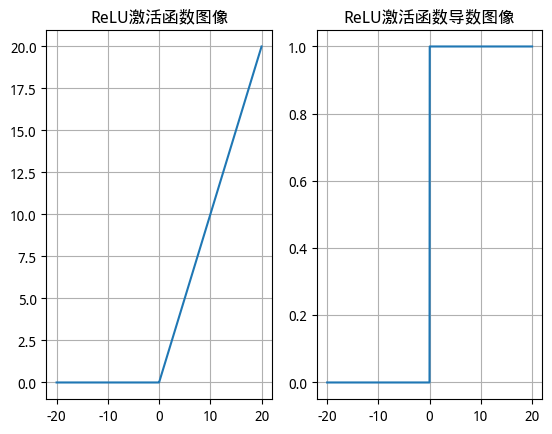

In [1]:
# 导包
import torch
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'SimHei', 'Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 1. 创建画布和坐标轴, 1行2列.
fig, axes = plt.subplots(1, 2)

# 2. 生成 -20 ~ 20之间的 1000个数据点.
x = torch.linspace(-20, 20, 1000)
# print(f'x: {x}')

# 3. 计算上述1000个点, ReLU激活函数处理后的值.
y = torch.relu(x)
# print(f'y: {y}')

# 4. 在第1个子图中绘制ReLU激活函数的图像.
axes[0].plot(x, y)
axes[0].set_title('ReLU激活函数图像')
axes[0].grid()

# 5. 在第2个图上, 绘制ReLU激活函数的导数图像.
# 5.1 重新生成 -20 ~ 20之间的 1000个数据点.
# 参1: 起始值, 参2: 结束值, 参3: 元素的个数, 参4: 是否需要求导.
x = torch.linspace(-20, 20, 1000, requires_grad=True)

# 5.2 具体的计算上述1000个点, ReLU激活函数导数后的值.
torch.relu(x).sum().backward()

# 5.3 绘制图像.
axes[1].plot(x.detach(), x.grad)
axes[1].set_title('ReLU激活函数导数图像')
axes[1].grid()
plt.show()